In [2]:
!git clone https://github.com/pondelion/yolact.git

Cloning into 'yolact'...
remote: Enumerating objects: 2964, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 2964 (delta 3), reused 27 (delta 3), pack-reused 2936
Receiving objects: 100% (2964/2964), 21.45 MiB | 34.87 MiB/s, done.
Resolving deltas: 100% (2005/2005), done.


In [1]:
%cd yolact

/content/yolact


In [5]:
!git checkout inference_module_for_myself

Branch 'inference_module_for_myself' set up to track remote branch 'inference_module_for_myself' from 'origin'.
Switched to a new branch 'inference_module_for_myself'


In [5]:
#!git pull origin inference_module_for_myself

From https://github.com/pondelion/yolact
 * branch            inference_module_for_myself -> FETCH_HEAD
Updating 57dc6d1..0bc8e9d
Fast-forward
 yolact_layers/box_utils.py             |  4 ++--
 yolact_layers/functions/detection.py   |  4 ++--
 yolact_layers/modules/multibox_loss.py |  2 +-
 yolact_layers/output_utils.py          |  6 +++---
 yolact_model.py                        | 10 +++++-----
 yolact_utils/augmentations.py          |  2 +-
 yolact_utils/functions.py              |  2 +-
 7 files changed, 15 insertions(+), 15 deletions(-)


In [2]:
from detector import Detector

In [3]:
d = Detector(
    cfg_name='yolact_resnet50_sampledataset_config',
    device='cuda'
)

/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'downsample_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'pred_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))
/usr/local/lib/python3.7/dist-packages/torch/jit/_recursive.py:235: UserWarning: 'lat_layers' was found in ScriptModule constants,  but it is a non-constant submodule. Consider removing it.
  " but it is a non-constant {}. Consider removing it.".format(name, hint))


In [4]:
d.load_weights('/content/yolact/weights/yolact_resnet50_mytest_239_240.pth')

In [5]:
classes, scores, boxes, masks = d.detect_imgfile(
    img_filepath='/content/yolact/yolact_data/images/sample/zidane.jpg',
    thresh=0.5,
)

In [9]:
classes

array([0, 0])

In [8]:
scores

array([0.66283315, 0.52148944], dtype=float32)

In [10]:
boxes

array([[ 851,   36, 1058,  292],
       [ 443,  181,  675,  437]])

In [7]:
len(masks)

2

In [12]:
masks[0].shape

(720, 1280)

In [15]:
masks[0]

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]], dtype=float32)

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

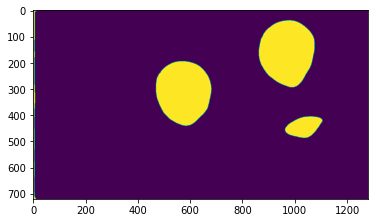

In [13]:
plt.imshow(masks[0])

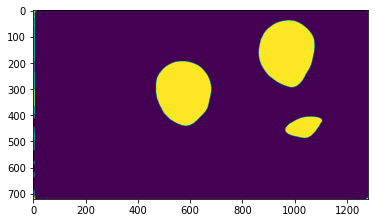

In [14]:
plt.imshow(masks[1])

In [19]:
org_img = Image.open('/content/yolact/yolact_data/images/sample/zidane.jpg')

In [23]:
org_img.size

(1280, 720)

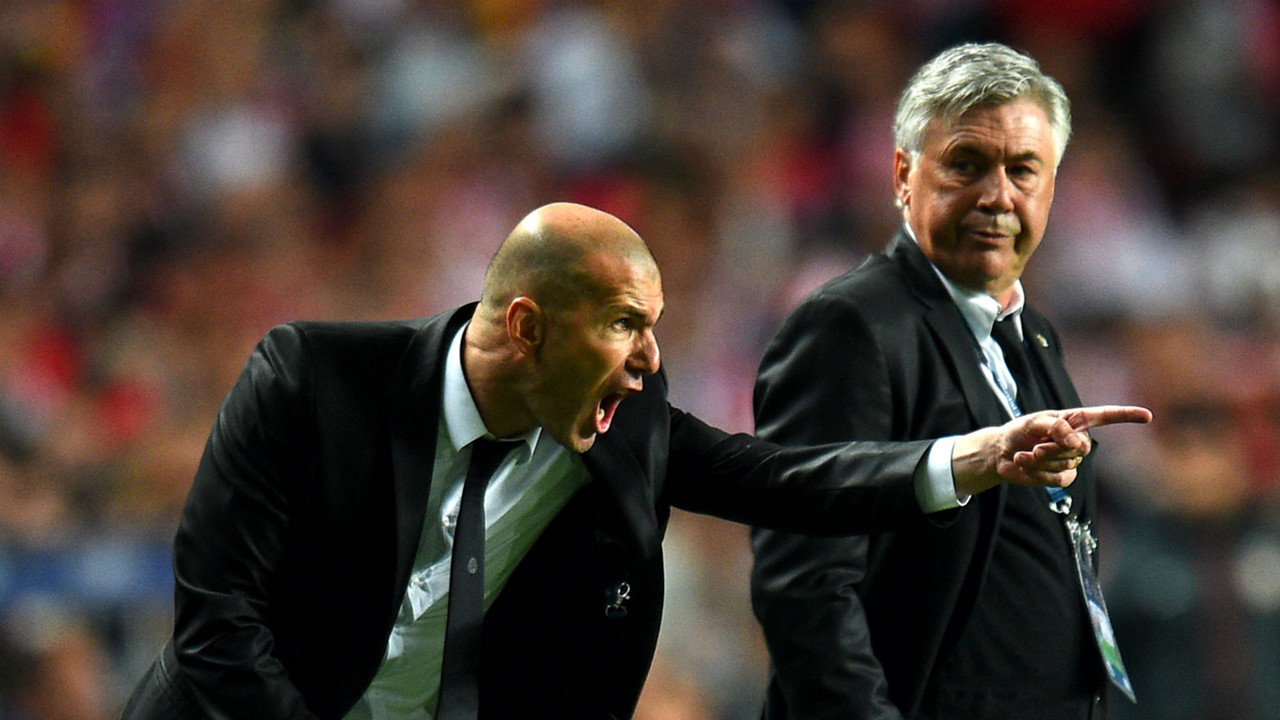

In [22]:
org_img

In [29]:
np.array(org_img).shape

(720, 1280, 3)

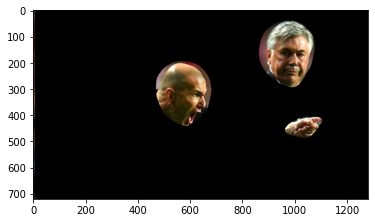

In [38]:
plt.imshow(
    (np.array(org_img) * np.expand_dims(masks[0], axis=2)).astype(int)
)